
<img src="https://www.grupoioe.es/wp-content/uploads/2020/02/machine-learning-cab.jpg" alt="Alt text" width="1500" height="300">

# <b>1<span style='color:#F1A424'>|</span> Histopathologic Cancer Detection</b>

Por: Iván Darío Gómez Marín\
C.C: 1.041.147.729\
Maestría en ingeniería- Grupo ALIADO\
Correo: idario.gomez@udea.edu.co

------------------------------------------------------------------------------------------------------------------------------------------------


<div style="text-align: justify;">

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>1.1 |</span></b> Contexto de la aplicación</b></p>
</div>

La aplicación propuesta proviene la una competencia publicada en la platataforma Kaggle, que puede encontrarse en el siguiente link:
 [histopathologic_cancer_detection](https://www.kaggle.com/competitions/histopathologic-cancer-detection). \
El reto de la competencia radica en **crear un algoritmo para identificarcáncer metastásico en pequeños parches de imágenes tomadas de exploraciones patológicas digitales de mayor tamaño**. Los datos para esta competición son una versión ligeramente modificada del conjunto de datos de referencia PatchCamelyon (PCam).PCam convierte la tarea clínica de detección de metástasis en una sencilla tarea de clasificación binaria de imágenes, similar a CIFAR-10 y MNIST.
</div>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>1.2 |</span></b> Objetivo de ML</b></p>
</div>


<div style="text-align: justify;">

Dada una imagen etiquetada previamente indicando si se identifica tejido cancerigeno en ella, el objetivo es crear un modelo de clasificación binario que dada uma imagen permita discriminarla, indicado si hay presencia de tejido canncerígeno o no; 1 indica la presencia de tejido cancerigeno en la imagen y 0 la ausencia de este.
</div>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>1.3 |</span></b> Conjunto de datos</b></p>
</div>

<div style="text-align: justify;">

El conjunto completo de imagenes disponible para el entrenamiento y validación del modelo, se puede acceder a través del siguiente link: https://www.kaggle.com/competitions/histopathologic-cancer-detection/data. \
El conjunto de datos consiste en imágenes microscópicas de tejido de ganglios linfáticos. Cada imagen tiene una resolución de 96x96 píxeles, y la tarea consistirá en identificar tejido canceroso metastásico en una región central de la imagen de 32x32 píxeles. Según la descripción de la competencia de Kaggle, la identificación de al menos 1 píxel de tejido tumoral etiquetaría efectivamente la imagen como positiva, es decir, con cáncer. El conjunto de datos original de entrenamiento consta de **220.025 imágenes**.
**Nota:**En nuestro caso de estudio, por cuestiones pedagógicas y por temas de capacidad computacional, haremos uso de un subconjunto de **30.000 imagenes** de al cual se puede acceder con ayuda del siguiente código**:
</div>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>1.4 |</span></b> Métricas de desempeño</b></p>
</div>

En la competición, la evaluación del desempeño se hizo con base en la curva ROC; En general cuanto más "arriba y a la izquierda"  del diagrama se encuentre la curva ROC, mejor será el clasificador.


<img src="https://miro.medium.com/v2/resize:fit:1200/1*Bgc9QOjhnL70g2SQxyj6hQ.png" alt="Alt text" width="300" height="Height">

# <b>2 <span style='color:#F1A424'>|</span> Dataset </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.1 |</span></b> Carga del dataset</b></p>
</div>

Haciendo uso de la API de Kaggle descargamos los datos desde la web

In [ ]:
# librerias requeridas
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import os, cv2
import matplotlib.image as mpimg
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from keras.optimizers import SGD
from keras.metrics import BinaryAccuracy, Precision, Recall
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib as mpl
import plotly.express as px

pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth', None)
tf.__version__

'2.14.0'

In [ ]:
# usuario y contraseña de la API de Kaggle para acceder a los datos
os.environ['KAGGLE_USERNAME'] = 'ivangmez'
os.environ['KAGGLE_KEY'] = '12bd1ac6150fdd46473fb60f6a98e7f7'

In [ ]:
# Descarga del dataset completo de la competición
!kaggle competitions download -c histopathologic-cancer-detection

100% 6.30G/6.31G [01:01<00:00, 136MB/s]
100% 6.31G/6.31G [01:01<00:00, 110MB/s]


In [ ]:
# Descomprime las imagenes
!unzip histopathologic-cancer-detection.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: train/fa2efd2dda5235a3e397ea0dd637ea13a78f7599.tif  
  inflating: train/fa2f1d5e86165f63c57acdf9d23521f2b8070e0c.tif  
  inflati

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.2 |</span></b> Generación del dataset para entrenamiento</b></p>
</div>

Construiremos un modelo con base en 50.000 imagenes seleccionadas aleatoriamente.

In [ ]:
# Funciones auxiliares
def get_sample(n):
    '''Función para seleccionar una muestra de tamaño n del dataset original'''
    try:
      import google.colab
      train_path= r'/content/train_labels.csv'
      IN_COLAB = True
    except ImportError:
      IN_COLAB = False
      path = os.path.join(os.path.abspath(os.getcwd()), "Dataset_cancer_detection")
      train_path = os.path.join(path, 'train')
    train= pd.read_csv(train_path, dtype=str)
    train_sample = train.sample(n=n, random_state=13).reset_index(drop=True)
    train_sample.id = train_sample.id + '.tif'
    return train_sample



In [ ]:
train= get_sample(n=50000)
train.head()

,id,label
0,ff5b49b279e592860ab4ddd0ffaf9ab084ad99ff.tif,1
1,094bf5958894f566b2db647146b9c149886aa3a4.tif,0
2,e272427b04ce08f86096a19e070ce1bdcd28f0ac.tif,1
3,e6837d2ec1e1e70ca0ddb5866a2439f4ecabe16a.tif,1
4,b87bf88feebe5674cdbe6a14f6007a490ea1152f.tif,1


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.3 |</span></b> Visualización</b></p>
</div>

Seleccionamos 12 imagenes de forma aleatoria para su visualización. Posteriormente  verificamos que el dataset elegido de forma aleatoria está desbalanceado.

In [ ]:
def show_img_sample(n=12):
  '''Función para graficar n imagenes del set de entrenamiento'''
  try:
    import google.colab
    train_path= r'/content/train'
    IN_COLAB = True
  except ImportError:
    IN_COLAB = False
    path = os.path.join(os.path.abspath(os.getcwd()), "Dataset_cancer_detection")
    train_path = os.path.join(path, 'train')

  sample = train.sample(n=n).reset_index()
  plt.figure(figsize=(6,6))
  for i, row in sample.iterrows():
      img = mpimg.imread(os.path.join(train_path, row.id))
      label = row.label
      plt.subplot(4,4,i+1)
      plt.imshow(img)
      plt.text(0, -5, f'Class {label}', color='k')
      plt.axis('off')

  plt.tight_layout()
  plt.show()
  return train_path

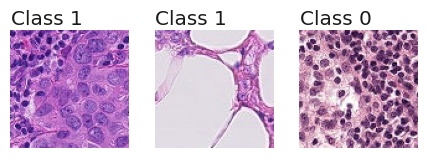

In [ ]:
train_path= show_img_sample(n=3)

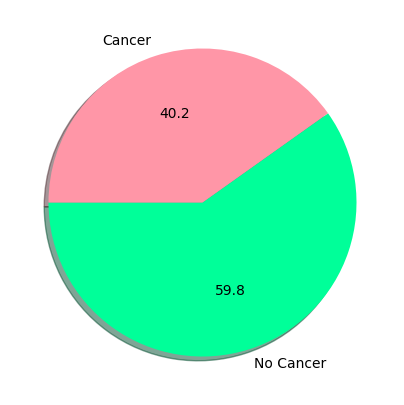

0    29917
1    20083
Name: label, dtype: int64

In [ ]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.pie(train['label'].value_counts(), labels=['No Cancer', 'Cancer'], startangle=180,
         autopct='%1.1f', colors=['#00ff99','#FF96A7'], shadow=True)

plt.show()
train.label.value_counts()

El dataset elegido está desbalanceado debido a que está conformado por **20.083 imágenes sin tejido cancerígeno** y **29.917 con tejido cancerígeno**. En el modelamiento se implementarán estrategias que permitan disminuir los efectos negativos que suele traer este desequilibrio.

# <b>3 <span style='color:#F1A424'>|</span> Modelamiento</b>



### <b>3.1 <span style='color:#F1A424'>|</span> Definiciones previas</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.1.1|</span></b> Funciones auxiliares</b></p>
</div>

In [ ]:
def plot_metrics(model_history):
  ''' Función para graficar las 'metrics' los epochs'''
  metrics = ['loss','f1_score','recall', 'auc']
  #metrics = ['loss','recall', 'auc']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(model_history.epoch, model_history.history[metric], color=colors[0], label='Train')
    plt.plot(model_history.epoch, model_history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_multiple_roc_curves(roc_data):
    plt.figure(figsize=(10, 8))

    for label, (fpr, tpr) in roc_data.items():
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (label, roc_auc))

    # Customize the plot
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()



def plot_confusion_matrix(y_pred_proba,y_true, classes=['Sin cáncer', 'Con cáncer'], title='Confusion Matrix', cmap='Blues', print_report=True):
  ''' Función para la creación de la matriz de confusión'''
  y_pred= [ 1 if  prob>0.5 else 0 for prob in np.ravel(y_pred_proba)]
  cm = confusion_matrix(y_true, y_pred)
  classes = unique_labels(y_true, y_pred)

  # Create a seaborn heatmap
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.2)
  sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(title)
  plt.show()
  if print_report:
    pred_class= [ 1 if  prob>0.5 else 0 for prob in np.ravel(y_pred_proba)]
    print(classification_report(y_true, pred_class))

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.1.2 |</span></b> Definición de métricas</b></p>
</div>

Estas serán las métricas que se verificarán durante el entrenamiento de los modelos.

In [ ]:
METRICS = [
      keras.metrics.BinaryCrossentropy(name='crossentropy'),  # same as model's loss
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      tf.keras.metrics.F1Score(name='f1_score',threshold=0.5)
]

In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0.03, patience=3)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.1.3 |</span></b> División del dataset</b></p>
</div>

In [ ]:
# Elegimos un subconjunto equivalente al 20% para el testeo (10000 imagenes)
train_df, test_df = train_test_split(train, test_size=0.2, random_state=1)


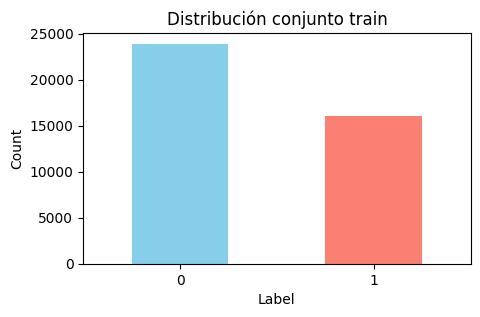

0    23924
1    16076
Name: label, dtype: int64

In [ ]:
# El conjunto de entrenamiento se encuentra desbalanceado
# Plotting the distribution of labels
plt.figure(figsize=(5, 3))
train_df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución conjunto train')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
train_df.label.value_counts()

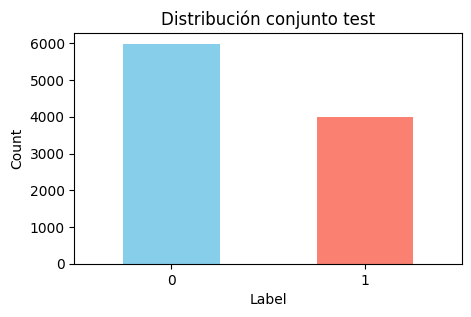

0    5993
1    4007
Name: label, dtype: int64

In [ ]:
# Plotting the distribution of labels
plt.figure(figsize=(5, 3))
test_df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución conjunto test')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
test_df.label.value_counts()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.1.4 |</span></b> Creación de dataloaders</b></p>
</div>

Esta función creará los dataloaders para proporcionarle los datos de entrenamiento y prueba los modelos en el método fit.

In [ ]:
def create_train_loader(train_df, train_path, class_weight_dict= None):
  BATCH_SIZE = 100
  train_datagen = ImageDataGenerator(rescale=1./255.) # Realizamos una normalización de los pixeles
  train_loader = train_datagen.flow_from_dataframe(
      dataframe = train_df,
      directory = train_path,
      x_col = 'id',
      y_col = 'label',
      batch_size = BATCH_SIZE,
      seed = 1,
      shuffle = True,
      class_mode = 'binary',
      target_size = (96,96),
      class_weight=class_weight_dict)
  TR_STEPS = len(train_loader)
  return train_loader, TR_STEPS

def create_test_loader(test_df, train_path):
  BATCH_SIZE = 100
  test_datagen = ImageDataGenerator(rescale=1./255.)
  test_loader = test_datagen.flow_from_dataframe(
      dataframe = test_df,
      directory = train_path,
      x_col = 'id',
      y_col = 'label',
      batch_size = BATCH_SIZE,
      seed = 1,
      shuffle = False,
      class_mode = 'binary',
      target_size = (96,96))
  VA_STEPS = len(test_loader)
  return test_loader, VA_STEPS

### <b>3.2 <span style='color:#F1A424'>|</span> Modelo 1: Modelo base </b>


Podemos observar que el conjunto de entrenamiento y de prueba se encuentran desbalanceados;  primero veremos que tal se comporta el modelo inicial ante este desbalance y posteriormente propondremos lo siguiente:

* Usaremos la opción **class_weight** en el mismo modelo para ajustar los pesos de forma que la muestra de las imagenes con cancer tenga más importancia dentro del entrenamiento y se mejore la predicción de esta clase.

* Elegiremos una muestra de entrenamiento balanceada  para observar el efecto que tiene esta elección

* Propondremos un modelo con transfer learning (ResNet50) y analizaremos su desempeño al compararlo con los modelos construidos previamente.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.2.1 |</span></b> Arquitectura del modelo</b></p>
</div>


In [ ]:
# Modelo base
def build_base_model():
  model = Sequential([
      Conv2D(16,(3,3), padding='same',activation='LeakyReLU',input_shape=(96,96,3)),
      MaxPooling2D(pool_size=(2,2)),
      Conv2D(64,(3,3), activation='LeakyReLU'),
      MaxPooling2D(pool_size=(2,2)),
      Conv2D(16,(3,3),activation='LeakyReLU'),
      MaxPooling2D(pool_size=(2,2)),
      Flatten(),
      Dense(300,activation='LeakyReLU'),
      Dropout(0.15),
      Dense(150,activation='LeakyReLU') ,
      Dense(1,activation='sigmoid')
      ])
  model.compile(optimizer='adam',loss='binary_crossentropy', metrics=METRICS)
  return model
initial_model= build_base_model()

initial_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        9232      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.2.2 |</span></b> Entrenamiento del modelo</b></p>
</div>


In [ ]:
%%time
train_loader, TR_STEPS= create_train_loader(train_df, train_path)
test_loader, VA_STEPS= create_test_loader(test_df, train_path)


baseline_history = initial_model.fit(
    x = train_loader,
    steps_per_epoch = TR_STEPS,
    epochs = 15,
    validation_data = test_loader,
    validation_steps = VA_STEPS,
    verbose = 1,
    callbacks=[early_stopping]
)

Found 40000 validated image filenames belonging to 2 classes.
Found 10000 validated image filenames belonging to 2 classes.
Epoch 1/15
400/400 [==============================] - 139s 292ms/step - loss: 0.4959 - crossentropy: 0.4959 - accuracy: 0.7686 - precision: 0.7479 - recall: 0.6400 - auc: 0.8311 - f1_score: 0.6897 - val_loss: 0.4322 - val_crossentropy: 0.4322 - val_accuracy: 0.8078 - val_precision: 0.7584 - val_recall: 0.7637 - val_auc: 0.8771 - val_f1_score: 0.7610
Epoch 2/15
400/400 [==============================] - 55s 136ms/step - loss: 0.4416 - crossentropy: 0.4416 - accuracy: 0.8030 - precision: 0.7809 - recall: 0.7086 - auc: 0.8685 - f1_score: 0.7430 - val_loss: 0.4414 - val_crossentropy: 0.4414 - val_accuracy: 0.8009 - val_precision: 0.8229 - val_recall: 0.6411 - val_auc: 0.8712 - val_f1_score: 0.7207
Epoch 3/15
400/400 [==============================] - 60s 150ms/step - loss: 0.4141 - crossentropy: 0.4141 - accuracy: 0.8207 - precision: 0.8024 - recall: 0.7349 - auc: 0.8

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.2.3 |</span></b> Métricas del modelo</b></p>
</div>

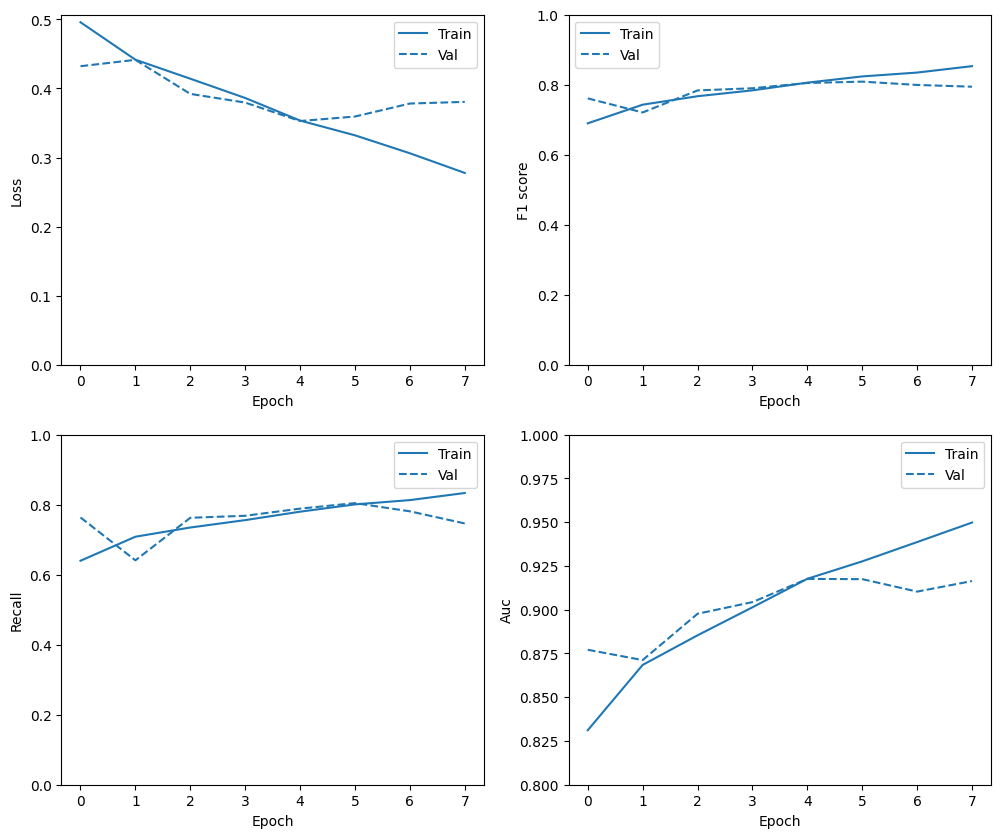

In [ ]:
plot_metrics(baseline_history)

In [ ]:
y_pred_prob=initial_model.predict(test_loader,steps=VA_STEPS,verbose=1)
y_test= (test_loader.labels)

100/100 [==============================] - 9s 85ms/step


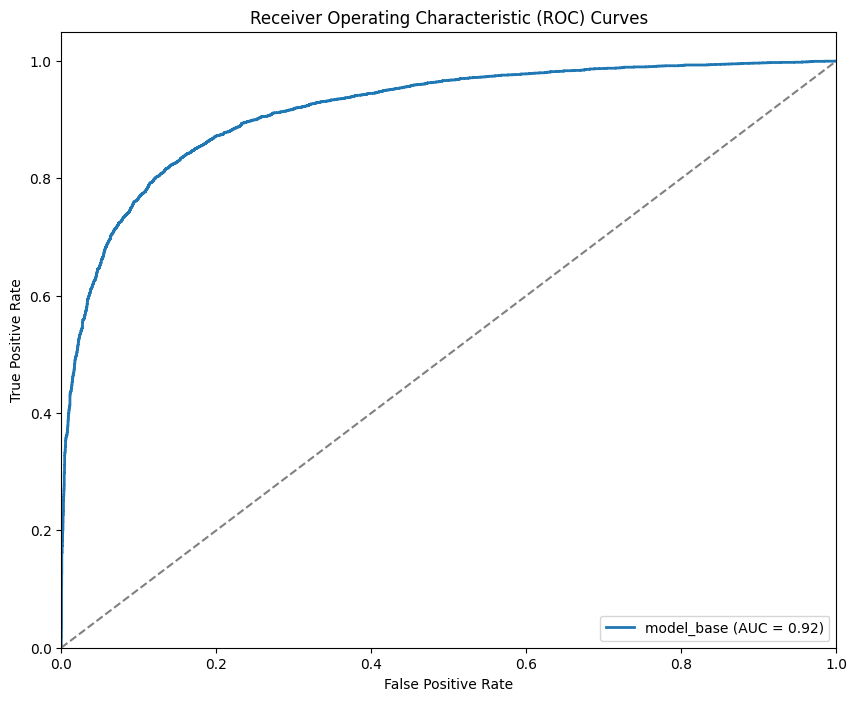

In [ ]:
roc_curve_data={}
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob)
roc_curve_data['model_base']=(fpr1, tpr1)

plot_multiple_roc_curves(roc_curve_data)



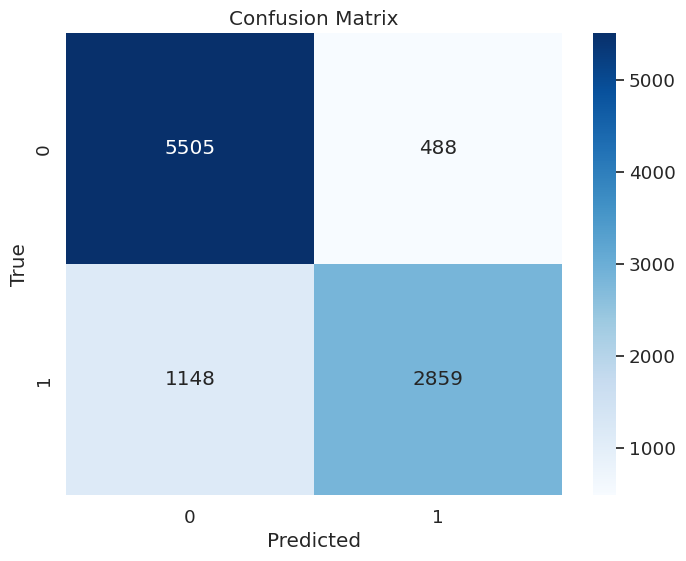

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      5993
           1       0.85      0.71      0.78      4007

    accuracy                           0.84     10000
   macro avg       0.84      0.82      0.82     10000
weighted avg       0.84      0.84      0.83     10000



In [ ]:
plot_confusion_matrix(y_pred_prob,y_test)

### <b>3.3 <span style='color:#F1A424'> | </span>Modelo 2: Set Weights</b>




<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.3.1 |</span></b> Arquitectura del modelo</b></p>
</div>

In [ ]:
model2 = build_base_model()
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 48, 48, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 16)        9232      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 16)       

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.3.2 |</span></b> Definición de los pesos</b></p>
</div>

In [ ]:
# 'balanced' indica que los pesos de las clases se calculan de forma inversa a la proporción de la clase
class_labels = np.unique(train.label)
class_weights = compute_class_weight(class_weight = "balanced",classes = class_labels, y= train.label)
class_weight_dict = {class_labels[i]: class_weights[i] for i in range(len(class_labels))}
class_weight_dict

{'0': 0.8356452852893004, '1': 1.244833939152517}

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.3.3 |</span></b> Entrenamiento del modelo</b></p>
</div>

In [ ]:
%%time
train_loader, TR_STEPS= create_train_loader(train_df, train_path, class_weight_dict= class_weight_dict)
test_loader, VA_STEPS= create_test_loader(test_df, train_path)
history2 = model2.fit(
    x = train_loader,
    steps_per_epoch = TR_STEPS,
    epochs = 15,
    validation_data = test_loader,
    validation_steps = VA_STEPS,
    verbose = 1,
    callbacks=[early_stopping],
)

Found 40000 validated image filenames belonging to 2 classes.
Found 10000 validated image filenames belonging to 2 classes.
Epoch 1/15
400/400 [==============================] - 71s 154ms/step - loss: 0.4836 - crossentropy: 0.4630 - accuracy: 0.7879 - precision: 0.7724 - recall: 0.6691 - auc: 0.8562 - f1_score: 0.7171 - val_loss: 0.4602 - val_crossentropy: 0.4602 - val_accuracy: 0.7912 - val_precision: 0.7411 - val_recall: 0.7360 - val_auc: 0.8592 - val_f1_score: 0.7385
Epoch 2/15
400/400 [==============================] - 50s 124ms/step - loss: 0.4362 - crossentropy: 0.4362 - accuracy: 0.8063 - precision: 0.7893 - recall: 0.7067 - auc: 0.8721 - f1_score: 0.7457 - val_loss: 0.4281 - val_crossentropy: 0.4281 - val_accuracy: 0.8102 - val_precision: 0.7758 - val_recall: 0.7402 - val_auc: 0.8799 - val_f1_score: 0.7576
Epoch 3/15
400/400 [==============================] - 59s 148ms/step - loss: 0.4091 - crossentropy: 0.4091 - accuracy: 0.8202 - precision: 0.8021 - recall: 0.7336 - auc: 0.88

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.3.4 |</span></b> Métricas del modelo</b></p>
</div>

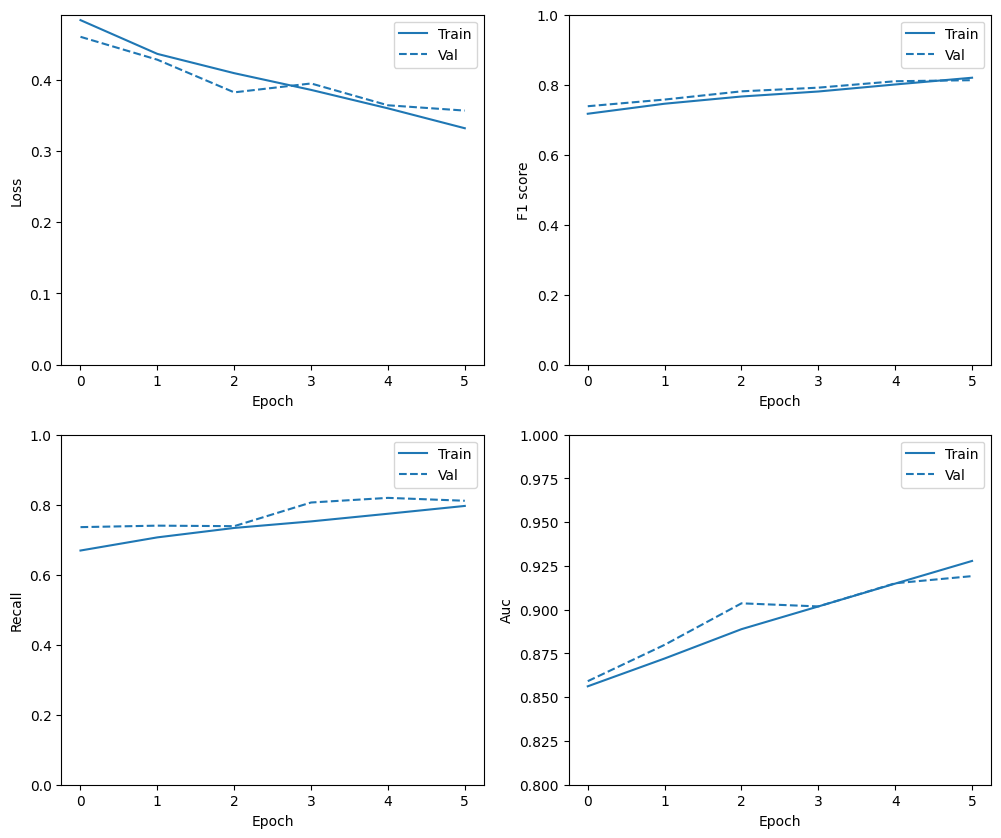

In [ ]:
plot_metrics(history2)

In [ ]:
y_pred_prob2=model2.predict(test_loader,steps=VA_STEPS,verbose=1)
y_test2= (test_loader.labels)

100/100 [==============================] - 16s 157ms/step


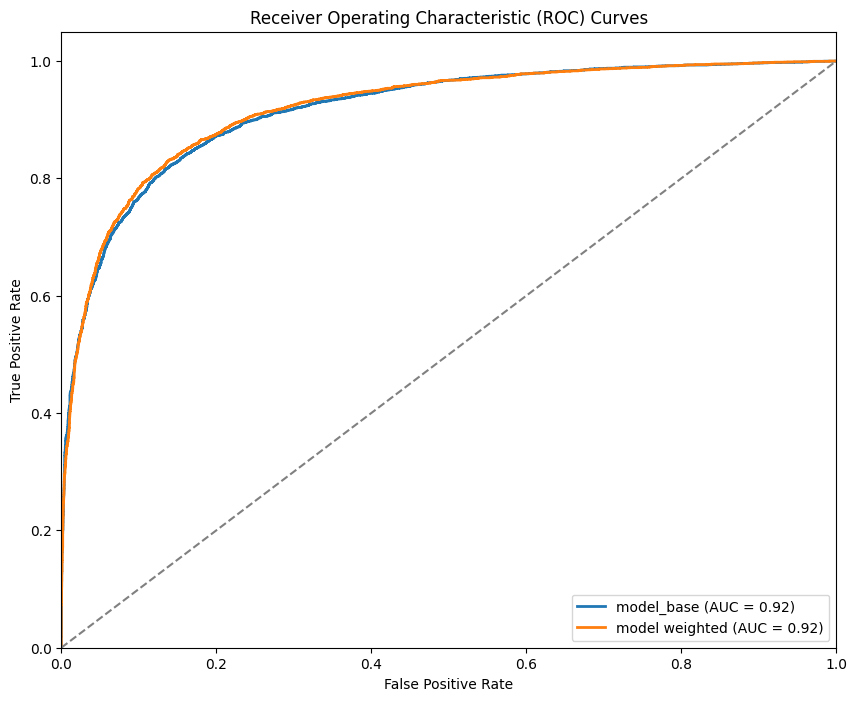

In [ ]:
fpr2, tpr2, _ = roc_curve(y_test2, y_pred_prob2)
roc_curve_data['model weighted']=(fpr2, tpr2)

plot_multiple_roc_curves(roc_curve_data)

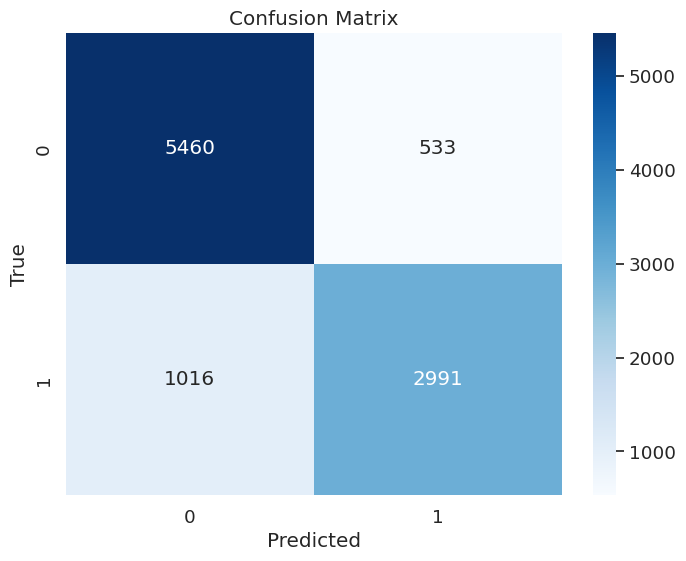

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      5993
           1       0.85      0.75      0.79      4007

    accuracy                           0.85     10000
   macro avg       0.85      0.83      0.84     10000
weighted avg       0.85      0.85      0.84     10000



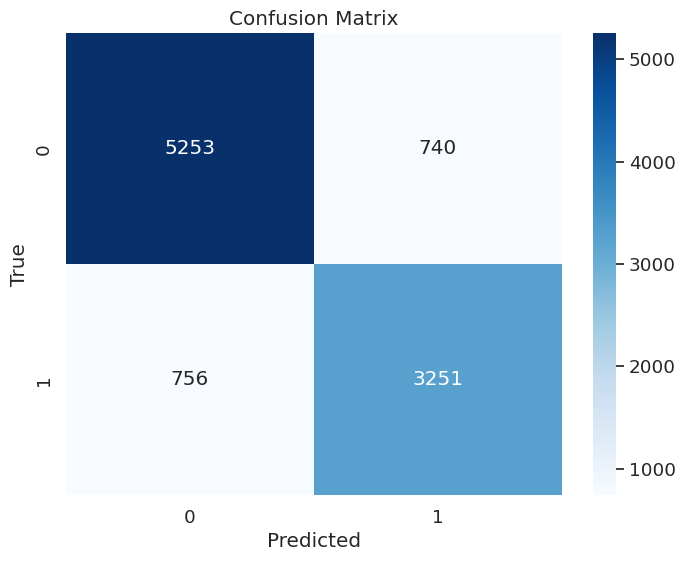

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      5993
           1       0.81      0.81      0.81      4007

    accuracy                           0.85     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
plot_confusion_matrix(y_pred_prob,y_test)
plot_confusion_matrix(y_pred_prob2,y_test2)


In [ ]:
pred_class= [ 1 if  prob>0.5 else 0 for prob in np.ravel(y_pred_prob2)]
print(classification_report(y_test2, pred_class))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      5993
           1       0.81      0.81      0.81      4007

    accuracy                           0.85     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000



### <b>3.4 <span style='color:#F1A424'> | </span>Modelo 3: Dataset balanceado</b>



A continuación elegiremos un subconjunto de datos para entrenamiento de forma aleatoria que contendrá el mismo número de imagenes con y sin cáncer; entrenaremos el modelo base y analizaremos los resultados comparandolos para el mismosubconjunto test usado previamente.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.4.1 |</span></b> Elección muestra</b></p>
</div>

In [ ]:
train_2= get_sample(n=100000)
train_2= pd.concat([train_2,test_df]).drop_duplicates(keep=False)

class_counts = train_2['label'].value_counts()
sample_size= 20000

train_df_bal = pd.DataFrame()
for class_label in class_counts.index:
    samples_from_class = train_2[train_2['label'] == class_label].sample(sample_size, random_state=13)
    train_df_bal = pd.concat([train_df_bal,samples_from_class])

train_df_bal = train_df_bal.reset_index(drop=True)


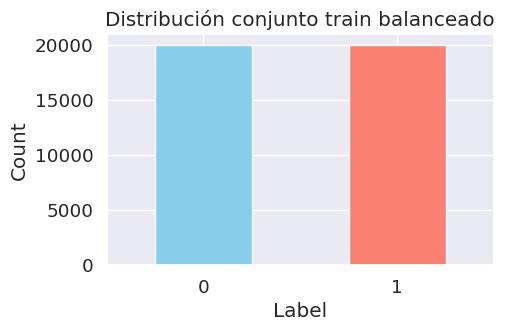

In [ ]:
# Plotting the distribution of labels
plt.figure(figsize=(5, 3))
train_df_bal['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución conjunto train balanceado')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.4.2 |</span></b> Entrenamiento del modelo</b></p>
</div>

In [ ]:
train_loader_bal, TR_STEPS= create_train_loader(train_df_bal, train_path)
test_loader_bal, VA_STEPS= create_test_loader(test_df, train_path)



Found 40000 validated image filenames belonging to 2 classes.
Found 10000 validated image filenames belonging to 2 classes.


In [ ]:
%%time
model3 = build_base_model()
history3 = model3.fit(
    x = train_loader_bal,
    steps_per_epoch = TR_STEPS,
    epochs = 15,
    validation_data = test_loader_bal,
    validation_steps = VA_STEPS,
    verbose = 1,
    callbacks=[early_stopping],
)

Epoch 1/15
400/400 [==============================] - 74s 177ms/step - loss: 0.5000 - crossentropy: 0.4713 - accuracy: 0.7795 - precision: 0.7728 - recall: 0.7661 - auc: 0.8576 - f1_score: 0.7694 - val_loss: 0.4203 - val_crossentropy: 0.4203 - val_accuracy: 0.8157 - val_precision: 0.7709 - val_recall: 0.7684 - val_auc: 0.8839 - val_f1_score: 0.7697
Epoch 2/15
400/400 [==============================] - 48s 121ms/step - loss: 0.4488 - crossentropy: 0.4488 - accuracy: 0.7949 - precision: 0.8040 - recall: 0.7799 - auc: 0.8723 - f1_score: 0.7918 - val_loss: 0.4364 - val_crossentropy: 0.4364 - val_accuracy: 0.8077 - val_precision: 0.7148 - val_recall: 0.8655 - val_auc: 0.8989 - val_f1_score: 0.7829
Epoch 3/15
400/400 [==============================] - 52s 130ms/step - loss: 0.4172 - crossentropy: 0.4172 - accuracy: 0.8133 - precision: 0.8192 - recall: 0.8040 - auc: 0.8909 - f1_score: 0.8115 - val_loss: 0.3766 - val_crossentropy: 0.3766 - val_accuracy: 0.8368 - val_precision: 0.8413 - val_rec

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.4.3 |</span></b> Métricas del modelo</b></p>
</div>

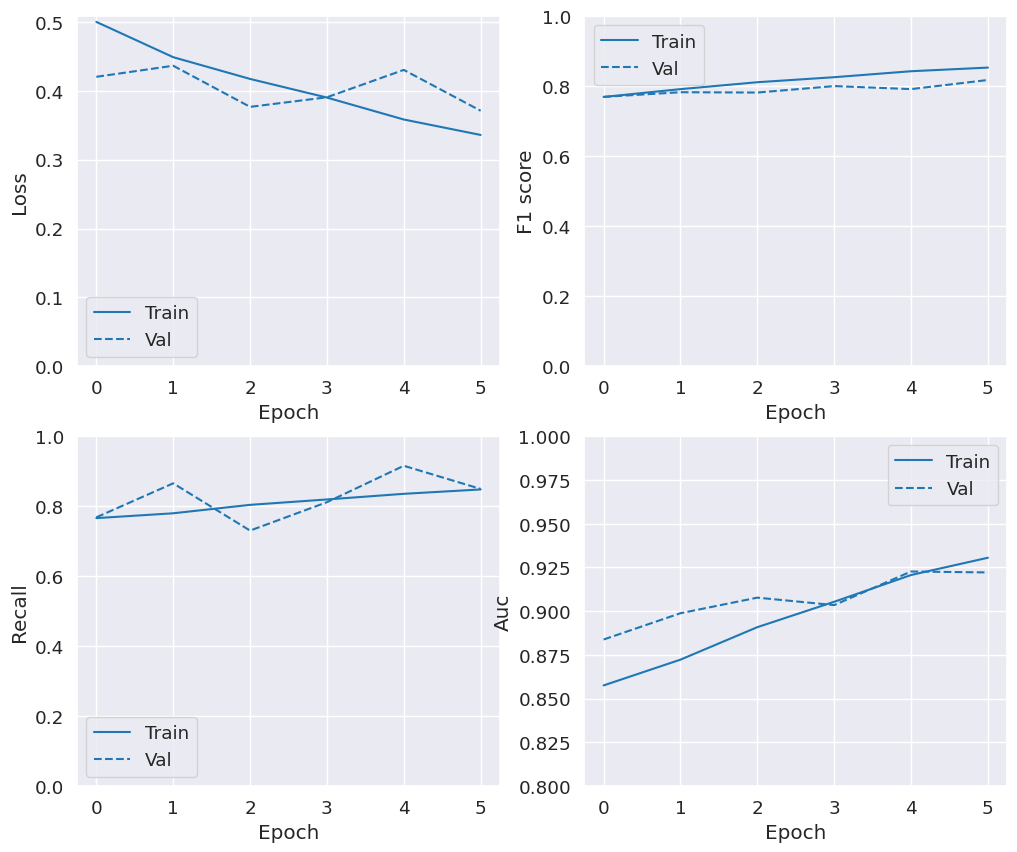

In [ ]:
plot_metrics(history3)

In [ ]:
y_pred_prob3=model3.predict(test_loader_bal,steps=VA_STEPS,verbose=1)
y_test3= (test_loader_bal.labels)

100/100 [==============================] - 9s 91ms/step


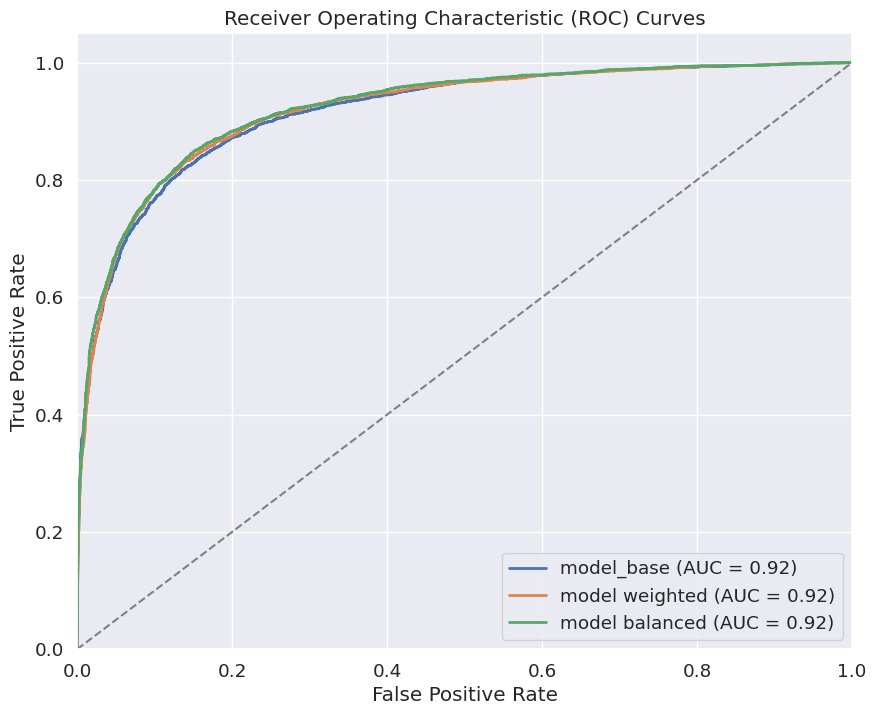

In [ ]:
fpr3, tpr3, _ = roc_curve(y_test3, y_pred_prob3)
roc_curve_data['model balanced']=(fpr3, tpr3)

plot_multiple_roc_curves(roc_curve_data)

In [ ]:
pred_class= [ 1 if  prob>0.5 else 0 for prob in np.ravel(y_pred_prob3)]
print(classification_report(y_test3, pred_class))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5993
           1       0.79      0.85      0.82      4007

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.85      0.85      0.85     10000



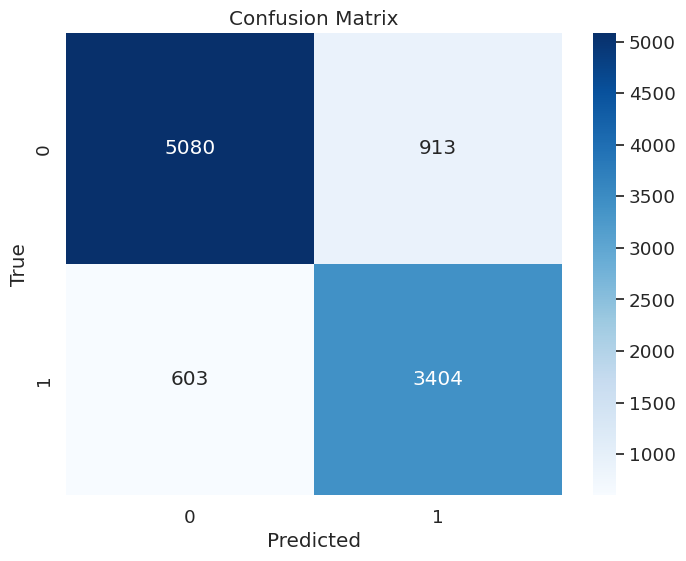

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5993
           1       0.79      0.85      0.82      4007

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
plot_confusion_matrix(y_pred_prob3,y_test3)


### <b>3.5 <span style='color:#F1A424'> | </span>Modelo 4: Transfer Learning ResNet50</b>



<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.5.1 |</span></b> Elección muestra</b></p>
</div>

In [ ]:
# Elegimos un subconjunto más pequeño para el testeo (20000 imagenes)

train_df= train.sample(n=20000).reset_index()
train_loader_new, TR_STEPS= create_train_loader(train_df, train_path)
test_loader, VA_STEPS= create_test_loader(test_df, train_path)


Found 20000 validated image filenames belonging to 2 classes.
Found 10000 validated image filenames belonging to 2 classes.


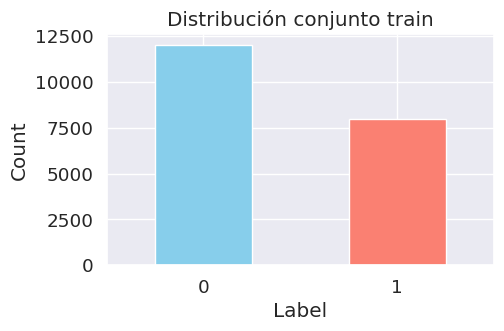

0    12008
1     7992
Name: label, dtype: int64

In [ ]:
# Plotting the new distribution of labels
plt.figure(figsize=(5, 3))
train_df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución conjunto train')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
train_df.label.value_counts()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.5.2 |</span></b> Arquitectura del modelo</b></p>
</div>

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [ ]:
def create_model(trainable=False, dense_size=100):
    m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5",
                   trainable=trainable),
    tf.keras.layers.Dense(dense_size, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
    return m

In [ ]:
model4 = create_model(trainable=False)
model4.build(input_shape=[None, 96, 96, 3])
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              55875273  
                                                                 
 dense_9 (Dense)             (None, 100)               100200    
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 55975574 (213.53 MB)
Trainable params: 100301 (391.80 KB)
Non-trainable params: 55875273 (213.15 MB)
_________________________________________________________________


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.5.3 |</span></b> Entrenamiento del modelo</b></p>
</div>

In [ ]:
%%time
history4 = model4.fit(
    x = train_loader_new,
    steps_per_epoch = TR_STEPS,
    epochs = 15,
    validation_data = test_loader,
    validation_steps = VA_STEPS,
    verbose = 1,
    callbacks=[early_stopping],
)

Epoch 1/15
200/200 [==============================] - 89s 249ms/step - loss: 0.5128 - crossentropy: 0.4655 - accuracy: 0.8060 - precision: 0.7566 - recall: 0.7591 - auc: 0.8753 - f1_score: 0.7579 - val_loss: 0.4069 - val_crossentropy: 0.4069 - val_accuracy: 0.8262 - val_precision: 0.8291 - val_recall: 0.7133 - val_auc: 0.8957 - val_f1_score: 0.7668
Epoch 2/15
200/200 [==============================] - 49s 245ms/step - loss: 0.3927 - crossentropy: 0.3927 - accuracy: 0.8273 - precision: 0.7957 - recall: 0.7638 - auc: 0.8987 - f1_score: 0.7794 - val_loss: 0.3864 - val_crossentropy: 0.3864 - val_accuracy: 0.8293 - val_precision: 0.7876 - val_recall: 0.7859 - val_auc: 0.9023 - val_f1_score: 0.7868
Epoch 3/15
200/200 [==============================] - 37s 185ms/step - loss: 0.3601 - crossentropy: 0.3601 - accuracy: 0.8391 - precision: 0.8128 - recall: 0.7760 - auc: 0.9151 - f1_score: 0.7940 - val_loss: 0.4005 - val_crossentropy: 0.4005 - val_accuracy: 0.8216 - val_precision: 0.7369 - val_rec

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.5.4 |</span></b> Métricas del modelo</b></p>
</div>

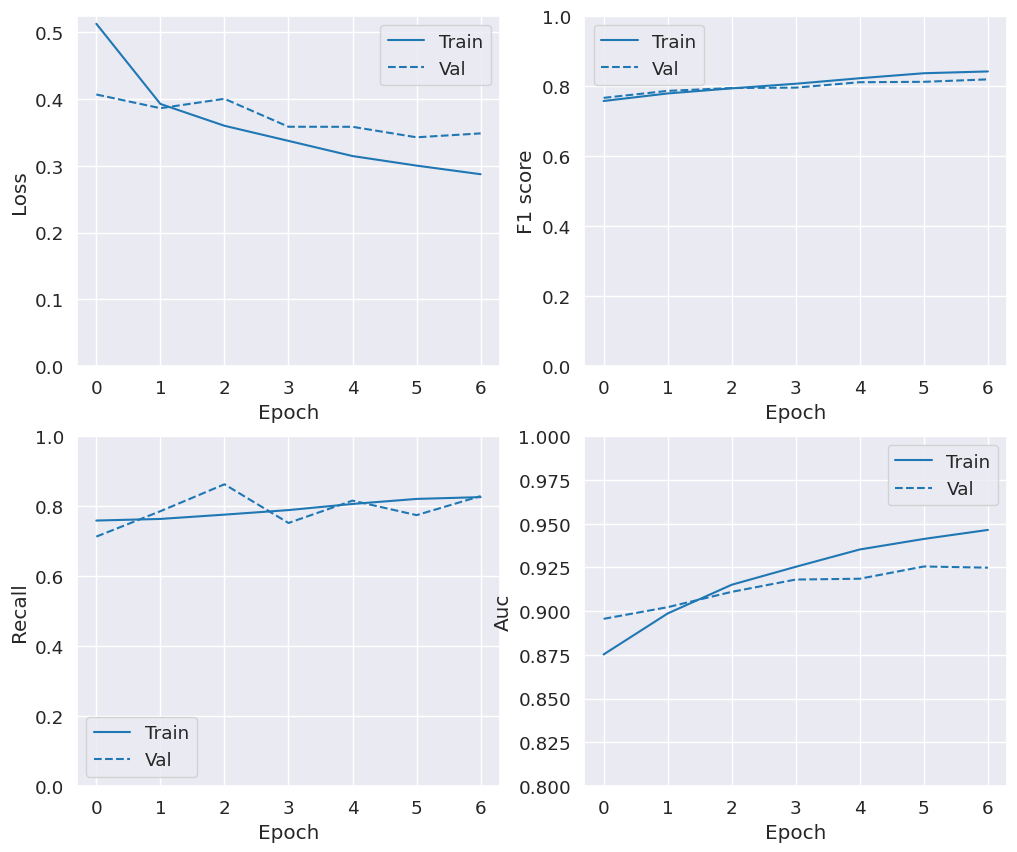

In [ ]:
plot_metrics(history4)

In [ ]:
y_pred_prob4=model4.predict(test_loader,steps=VA_STEPS,verbose=1)
y_test4= (test_loader.labels)

100/100 [==============================] - 14s 122ms/step


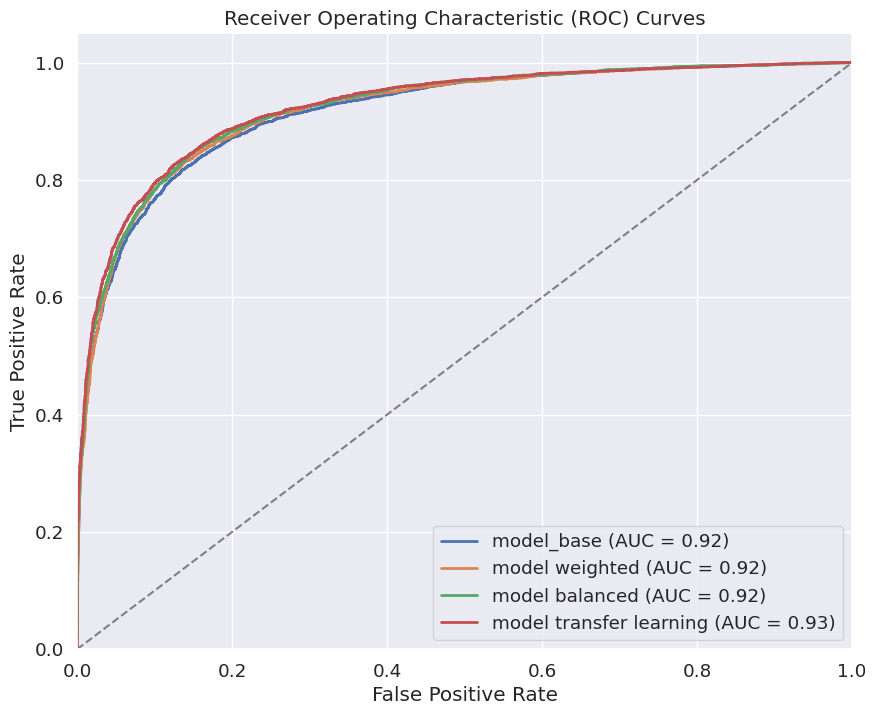

In [ ]:
fpr4, tpr4, _ = roc_curve(y_test4, y_pred_prob4)
roc_curve_data['model transfer learning']=(fpr4, tpr4)

plot_multiple_roc_curves(roc_curve_data)

In [ ]:
pred_class= [ 1 if  prob>0.5 else 0 for prob in np.ravel(y_pred_prob4)]
print(classification_report(y_test4, pred_class))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5993
           1       0.81      0.83      0.82      4007

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# <b>4 <span style='color:#F1A424'>|</span> Conclusiones</b>


* El modelo con transfer learning utilizando ResNet Inception V2 fue superior a los otros modelos en términos de métrica AUC sugiriendo que la capacidad de transferir conocimientos de modelos preentrenados puede ser crucial en tareas de clasificación de imágenes microscópicas de ganglios linfáticos.

* Ajustar los pesos inversamente proporcional a la cantidad de imágenes de cada clase tuvo un impacto positivo en la capacidad del modelo para aprender patrones específicos relacionados con las imágenes cancerígenas. Sin embargo, el hecho de que no superara al modelo de transfer learning sugiere que la información aprendida durante el entrenamiento de transferencia puede ser más valiosa que simplemente ajustar los pesos de las muestras.

* La elección del modelo adecuado depende de las necesidades específicas y de los recursos disponibles. Aunque el modelo con transfer learning fue el más efectivo, es importante considerar la complejidad del modelo y la disponibilidad de datos al tomar decisiones prácticas sobre implementación.